# Question 1 [Data Preparation]

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區
6,001,001012,10022810,吳悅慈,正7,北部,台北考區
7,001,001012,10236223,陳俞潔,正8,南部,台南考區
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區


In [2]:
# merge是將兩個表格用department ID合在一起的dataframe
merge = pd.DataFrame(0, index=all_depid, columns=all_stuid)

In [3]:
for i in range(len(stu_adm)):
    sch=stu_adm.iloc[i]['department_id']
    stu=stu_adm.iloc[i]['student_id']
    merge[stu][sch]=1

In [4]:
# 重複去掉過申請數小於二的學生和申請數小於十的校系
m=merge
prev=0
while(m.shape!=prev):
    prev=m.shape
    # ----------department--------------
    total=m.sum(axis=1)
    # print(total.shape)
    total=total[total<10]
    # print(total.shape)
    m=m.drop([t for t in total.index])
    print(m.shape)
    # print(total[:10])
    # ------------student--------------
    total=m.sum(axis=0)
    total=total[total<=1]
    m=m.drop([t for t in total.index],axis=1)
    print(m.shape)

(1931, 60461)
(1931, 47420)
(1918, 47420)
(1918, 47386)
(1917, 47386)
(1917, 47386)
(1917, 47386)
(1917, 47386)


### Q1.1: Report the number of academic department and student applicants in your dataset.

In [5]:
print("students: %d"%len(m.iloc[0]))
print("departments: %d"%len(m))
total=m.sum(axis=1)
total=total.sort_values(ascending=False)
print(total[:10])

students: 47386
departments: 1917
008122    386
012052    376
046032    367
004382    357
005192    353
008112    353
005182    351
015342    340
045012    339
046162    329
dtype: int64


### Q1.2: Report the top ten departments that recieved the most applications and the number of applications they received. Identify the department by their department_id and names.

In [6]:
from IPython import display
# top是申請數前十的系所
top=uname.loc[uname['department_id'].isin(total[:10].index)]
# print(top)
# names是照申請人數排的校系
names=[]
for t in total[:10].index:
    names.append(top.loc[top['department_id'] == t])
# print(names)
# res把學校名字和系所名字對上去
res=[]
for i in range(10):
    res.append([names[i]['school_name'].values[0],names[i]['department_name'].values[0],total.index[i],total[i]])
display.display(pd.DataFrame(res,columns=['學校','系所', '系所ID','申請次數']))

,學校,系所,系所ID,申請次數
0,中原大學,機械工程學系,008122,386
1,中國醫藥大學,藥學系,012052,376
2,銘傳大學,會計學系（臺北校區）,046032,367
3,國立成功大學,電機工程學系,004382,357
4,東吳大學,企業管理學系,005192,353
5,中原大學,土木工程學系,008112,353
6,東吳大學,會計學系,005182,351
7,逢甲大學,財務金融學系,015342,340
8,義守大學,電機工程學系,045012,339
9,銘傳大學,應用英語學系（桃園校區）,046162,329


# Question 2 [Explore]

In [29]:
# skool：用系所做index 對應學校 系所類別名 系所類別ID 系所類別縮寫 
# cat：照系所類別名和類別ID
skool = pd.DataFrame(index=m.index, columns=['school_name','category_name','category_id',"department_name_abbr"])
cat=dict()
for i in m.index:
    skool.loc[i]['category_name']=uname.loc[uname['department_id'] == i]['category_name'].values[0]
    skool.loc[i]['school_name']=uname.loc[uname['department_id'] == i]['school_name'].values[0]
    skool.loc[i]['category_id']=uname.loc[uname['department_id'] == i]['category_id'].values[0]
    skool.loc[i]['department_name_abbr']=uname.loc[uname['department_id'] == i]['department_name_abbr'].values[0]
    cat[skool.loc[i]['category_id']]=skool.loc[i]['category_name']
# print(skool)
# print(cat)

### Q2.1: Visualize academic departments using the first 8 principle components. 

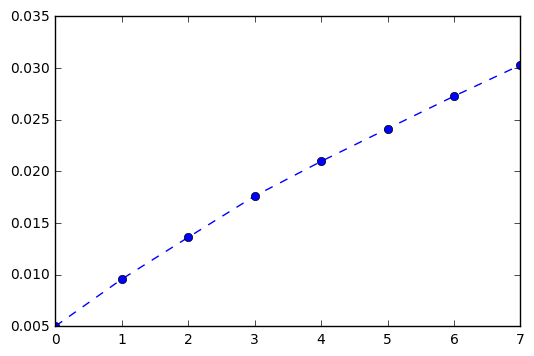

In [13]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
# 看feature累積的解釋力
estimator = PCA(n_components=8)
pca_x_train = estimator.fit_transform(m)
plt.plot(estimator.explained_variance_ratio_.cumsum(), '--o')
plt.show()

In [14]:
print(pca_x_train.shape)
ax=[]
for i in range(8):
    ax.append(pca_x_train[:,i])
print('Explained variation per principal component: {}'.format(estimator.explained_variance_ratio_))

(1917, 8)
Explained variation per principal component: [0.00502853 0.00455339 0.00404874 0.00399042 0.00335311 0.00316622
 0.00314135 0.00301458]


1 教育
10 服務
2 藝術及人文
3 社會科學、新聞學及圖書資訊
4 商業、管理及法律
5 自然科學、數學及統計
6 資訊通訊科技
7 工程、製造及營建
8 農業、林業、漁業及獸醫
9 醫藥衛生及社會福利
99 其他
------------------------0 and 1-----------------------------


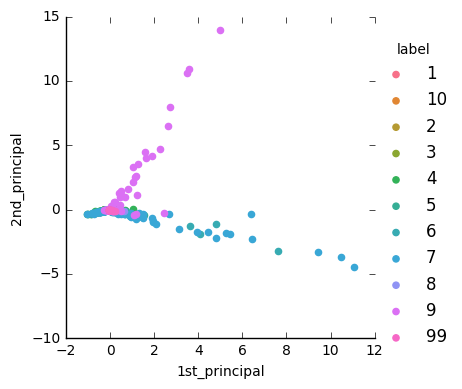

------------------------1 and 3-----------------------------


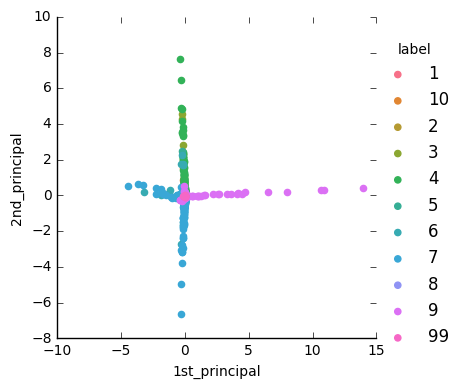

------------------------3 and 4-----------------------------


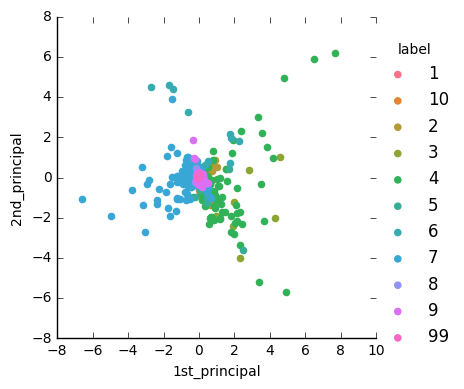

In [15]:
import seaborn as sn
def draw(one, two):
    new_coordinates = np.vstack((one, two, skool['category_id'])).T
    # print(new_coordinates)
    dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
    sn.FacetGrid(dataframe, hue="label", height=4).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()
keys = sorted(cat)
for key in keys:
    print(key, cat[key])
print("------------------------0 and 1-----------------------------")
draw(ax[0],ax[1])
print("------------------------1 and 3-----------------------------")
draw(ax[1],ax[3])
print("------------------------3 and 4-----------------------------")
draw(ax[3],ax[4])

------------------------1 and 7-----------------------------


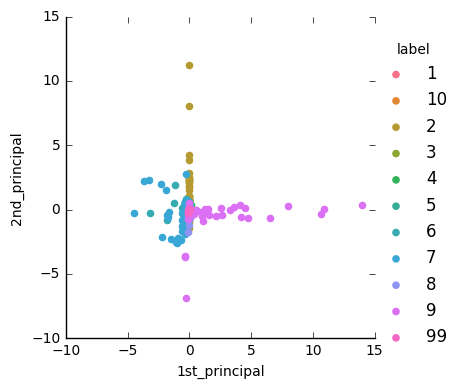

------------------------1 and 6-----------------------------


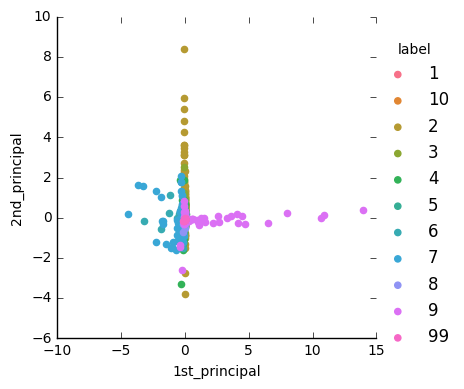

In [30]:
print("------------------------1 and 7-----------------------------")
draw(ax[1],ax[7])
print("------------------------1 and 6-----------------------------")
draw(ax[1],ax[6])

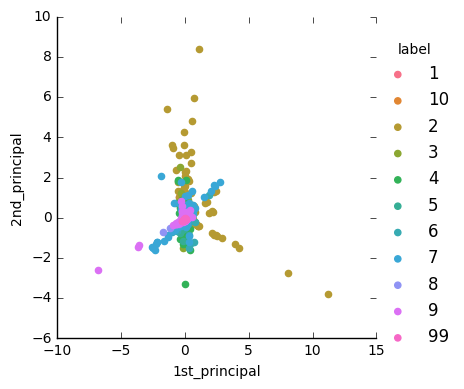

In [31]:
draw(ax[7],ax[6])

In [ ]:
# PCA分解出來的前八個component都蠻能夠區分類別的，其中第二個component和其他component畫出來的圖
# 可以將藝術及人文系所與其他系所明顯地分開
# 1 教育
# 10 服務
# 2 藝術及人文
# 3 社會科學、新聞學及圖書資訊
# 4 商業、管理及法律
# 5 自然科學、數學及統計
# 6 資訊通訊科技
# 7 工程、製造及營建
# 8 農業、林業、漁業及獸醫
# 9 醫藥衛生及社會福利
# 99 其他

### Q2.2: Visualize academic department using multiple dimensional scaling. 
### Metric

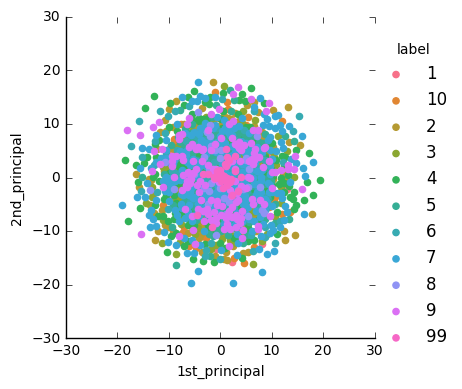

In [16]:
from sklearn.manifold import MDS
mds=MDS(n_components=2)
X_r=mds.fit_transform(m)
new_coordinates = np.vstack((X_r[:,0], X_r[:,1], skool['category_id'])).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(dataframe, hue="label", height=4).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Non-metric

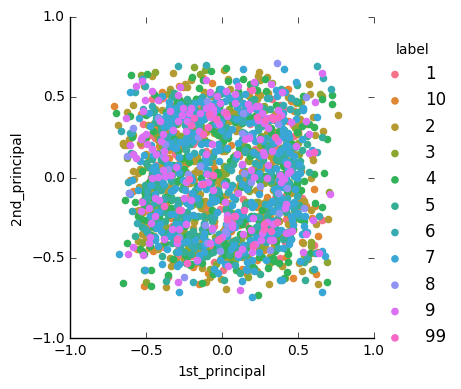

In [17]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
mds2=MDS(n_components=2, metric=False)
X_r2=mds2.fit_transform(m)
new_coordinates = np.vstack((X_r2[:,0], X_r2[:,1], skool['category_id'])).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(dataframe, hue="label", height=4).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
#MDS計算兩兩之間的Distance或Dissimilarity 此方法在這個資料集上無法將科系類別良好區分

### Q2.3: Visualize academic department using Locally Linear Embedding.
###  (1) Use 20 neighbors to construct the weight matrix

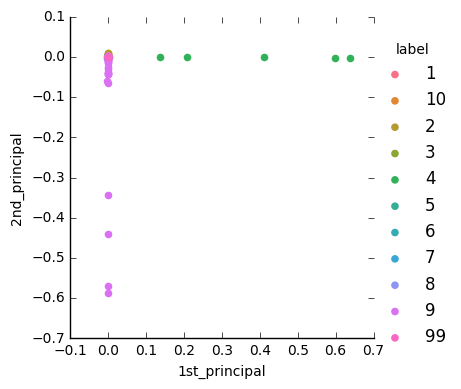

In [38]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=20)
X_transformed = embedding.fit_transform(m)
draw(X_transformed[:,0], X_transformed[:,1])

### (2) Use 40 neighbors to construct the weight matrix

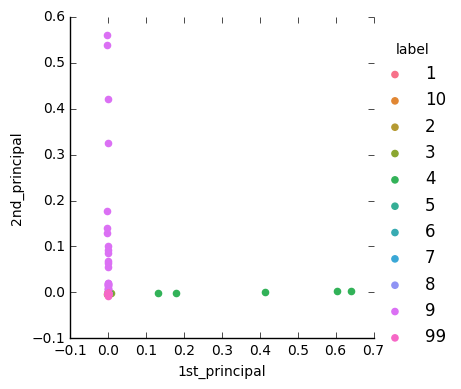

In [102]:
embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=40)
X_transformed = embedding.fit_transform(m)
draw(X_transformed[:,0], X_transformed[:,1])

### (3) Perform PCA transformation first, and use the first 100 principle components as the input to LLE (with 20 neighbors).

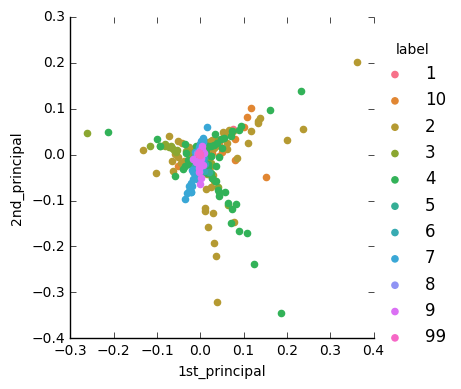

In [110]:
estimator = PCA(n_components=100)
pca_x_train = estimator.fit_transform(m)
embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=20)
X_transformed = embedding.fit_transform(pca_x_train)
draw(X_transformed[:,0], X_transformed[:,1])

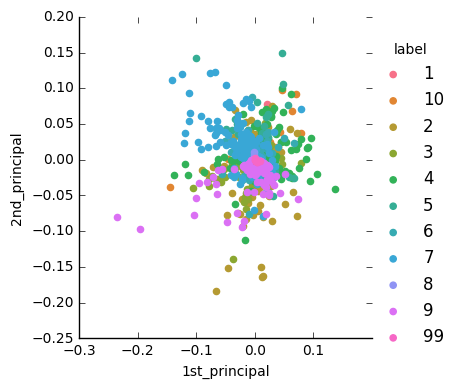

In [109]:
estimator = PCA(n_components=100)
pca_x_train = estimator.fit_transform(m)
embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=40)
X_transformed = embedding.fit_transform(pca_x_train)
draw(X_transformed[:,0], X_transformed[:,1])

In [ ]:
# 4 商業、管理及法律和 9 醫藥衛生及社會福利在前面兩種設定裡可以區分，而其他類別都重疊在一起
# 先做PCA再做LLE的效果比前兩種佳
# 1 教育
# 10 服務
# 2 藝術及人文
# 3 社會科學、新聞學及圖書資訊
# 4 商業、管理及法律
# 5 自然科學、數學及統計
# 6 資訊通訊科技
# 7 工程、製造及營建
# 8 農業、林業、漁業及獸醫
# 9 醫藥衛生及社會福利
# 99 其他

### Q2.4: Visualize academic department using Kernel PCA.
### RBF

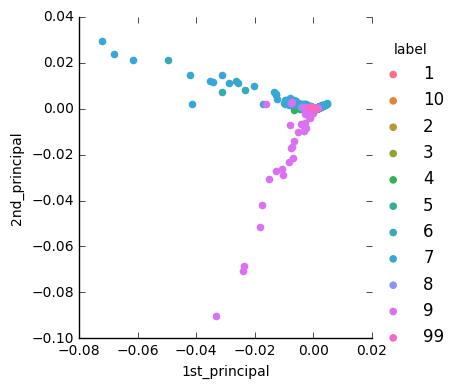

In [105]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf")
X_kpca = kpca.fit_transform(m)
draw(X_kpca[:,0], X_kpca[:,1])

### Cosine

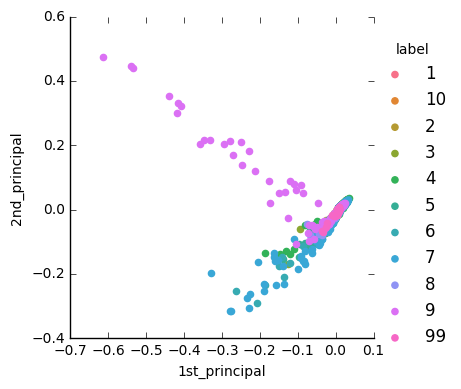

In [107]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="cosine")
X_kpca = kpca.fit_transform(m)
draw(X_kpca[:,0], X_kpca[:,1])

### sigmoid

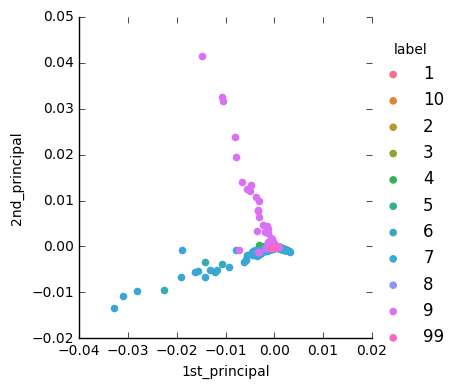

In [108]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="sigmoid")
X_kpca = kpca.fit_transform(m)
draw(X_kpca[:,0], X_kpca[:,1])

In [ ]:
# 三種kernel的效果都差不多，可以將7和9區分，而其他種類大都重疊在一起
# 1 教育
# 10 服務
# 2 藝術及人文
# 3 社會科學、新聞學及圖書資訊
# 4 商業、管理及法律
# 5 自然科學、數學及統計
# 6 資訊通訊科技
# 7 工程、製造及營建
# 8 農業、林業、漁業及獸醫
# 9 醫藥衛生及社會福利
# 99 其他

### Q2.5: Visualize academic department using t-SNE. 

In [19]:
from sklearn.manifold import TSNE
def T(method):
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, metric=method, random_state=3)
    X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
    tsne_results = tsne.fit_transform(m)

    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    draw((tsne_results[:,0], tsne_results[:,1])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1917 samples in 4.139s...
[t-SNE] Computed neighbors for 1917 samples in 237.677s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1917
[t-SNE] Computed conditional probabilities for sample 1917 / 1917
[t-SNE] Mean sigma: 1.556305
[t-SNE] KL divergence after 250 iterations with early exaggeration: 172.799881
[t-SNE] KL divergence after 1000 iterations: 3.370053
t-SNE done! Time elapsed: 264.1259169578552 seconds


### Euclidian

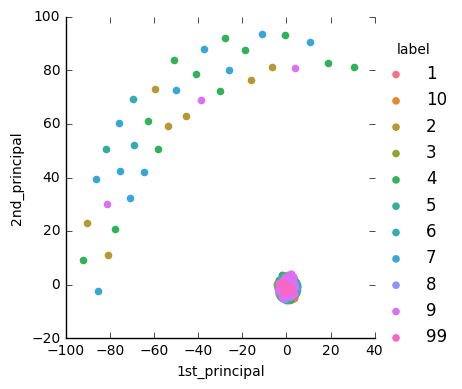

In [23]:
T('euclidean')

### Cosine

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1917 samples in 0.057s...
[t-SNE] Computed neighbors for 1917 samples in 2.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1917
[t-SNE] Computed conditional probabilities for sample 1917 / 1917
[t-SNE] Mean sigma: 0.195601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.026703
[t-SNE] KL divergence after 1000 iterations: 1.419656
t-SNE done! Time elapsed: 21.442689895629883 seconds


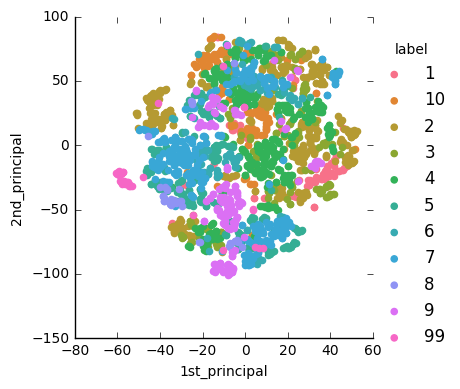

In [32]:
T('cosine')

### Jaccard

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1917 samples in 5.480s...
[t-SNE] Computed neighbors for 1917 samples in 264.482s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1917
[t-SNE] Computed conditional probabilities for sample 1917 / 1917
[t-SNE] Mean sigma: 0.144211
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.005081
[t-SNE] KL divergence after 1000 iterations: 1.485289
t-SNE done! Time elapsed: 286.6813659667969 seconds


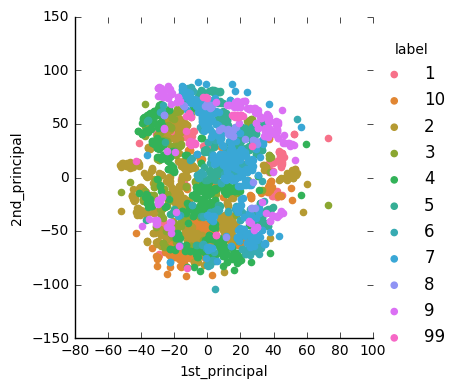

In [33]:
T('jaccard')

In [ ]:
# Euclidian的效果最不好，其他兩個kernel效果都不錯，Cosine最好將各類別分的最開，Jaccard還是有點集中

# Question 3 [Refine]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1917 samples in 0.036s...
[t-SNE] Computed neighbors for 1917 samples in 2.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1917
[t-SNE] Computed conditional probabilities for sample 1917 / 1917
[t-SNE] Mean sigma: 0.195601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.026703
[t-SNE] KL divergence after 1000 iterations: 1.419656


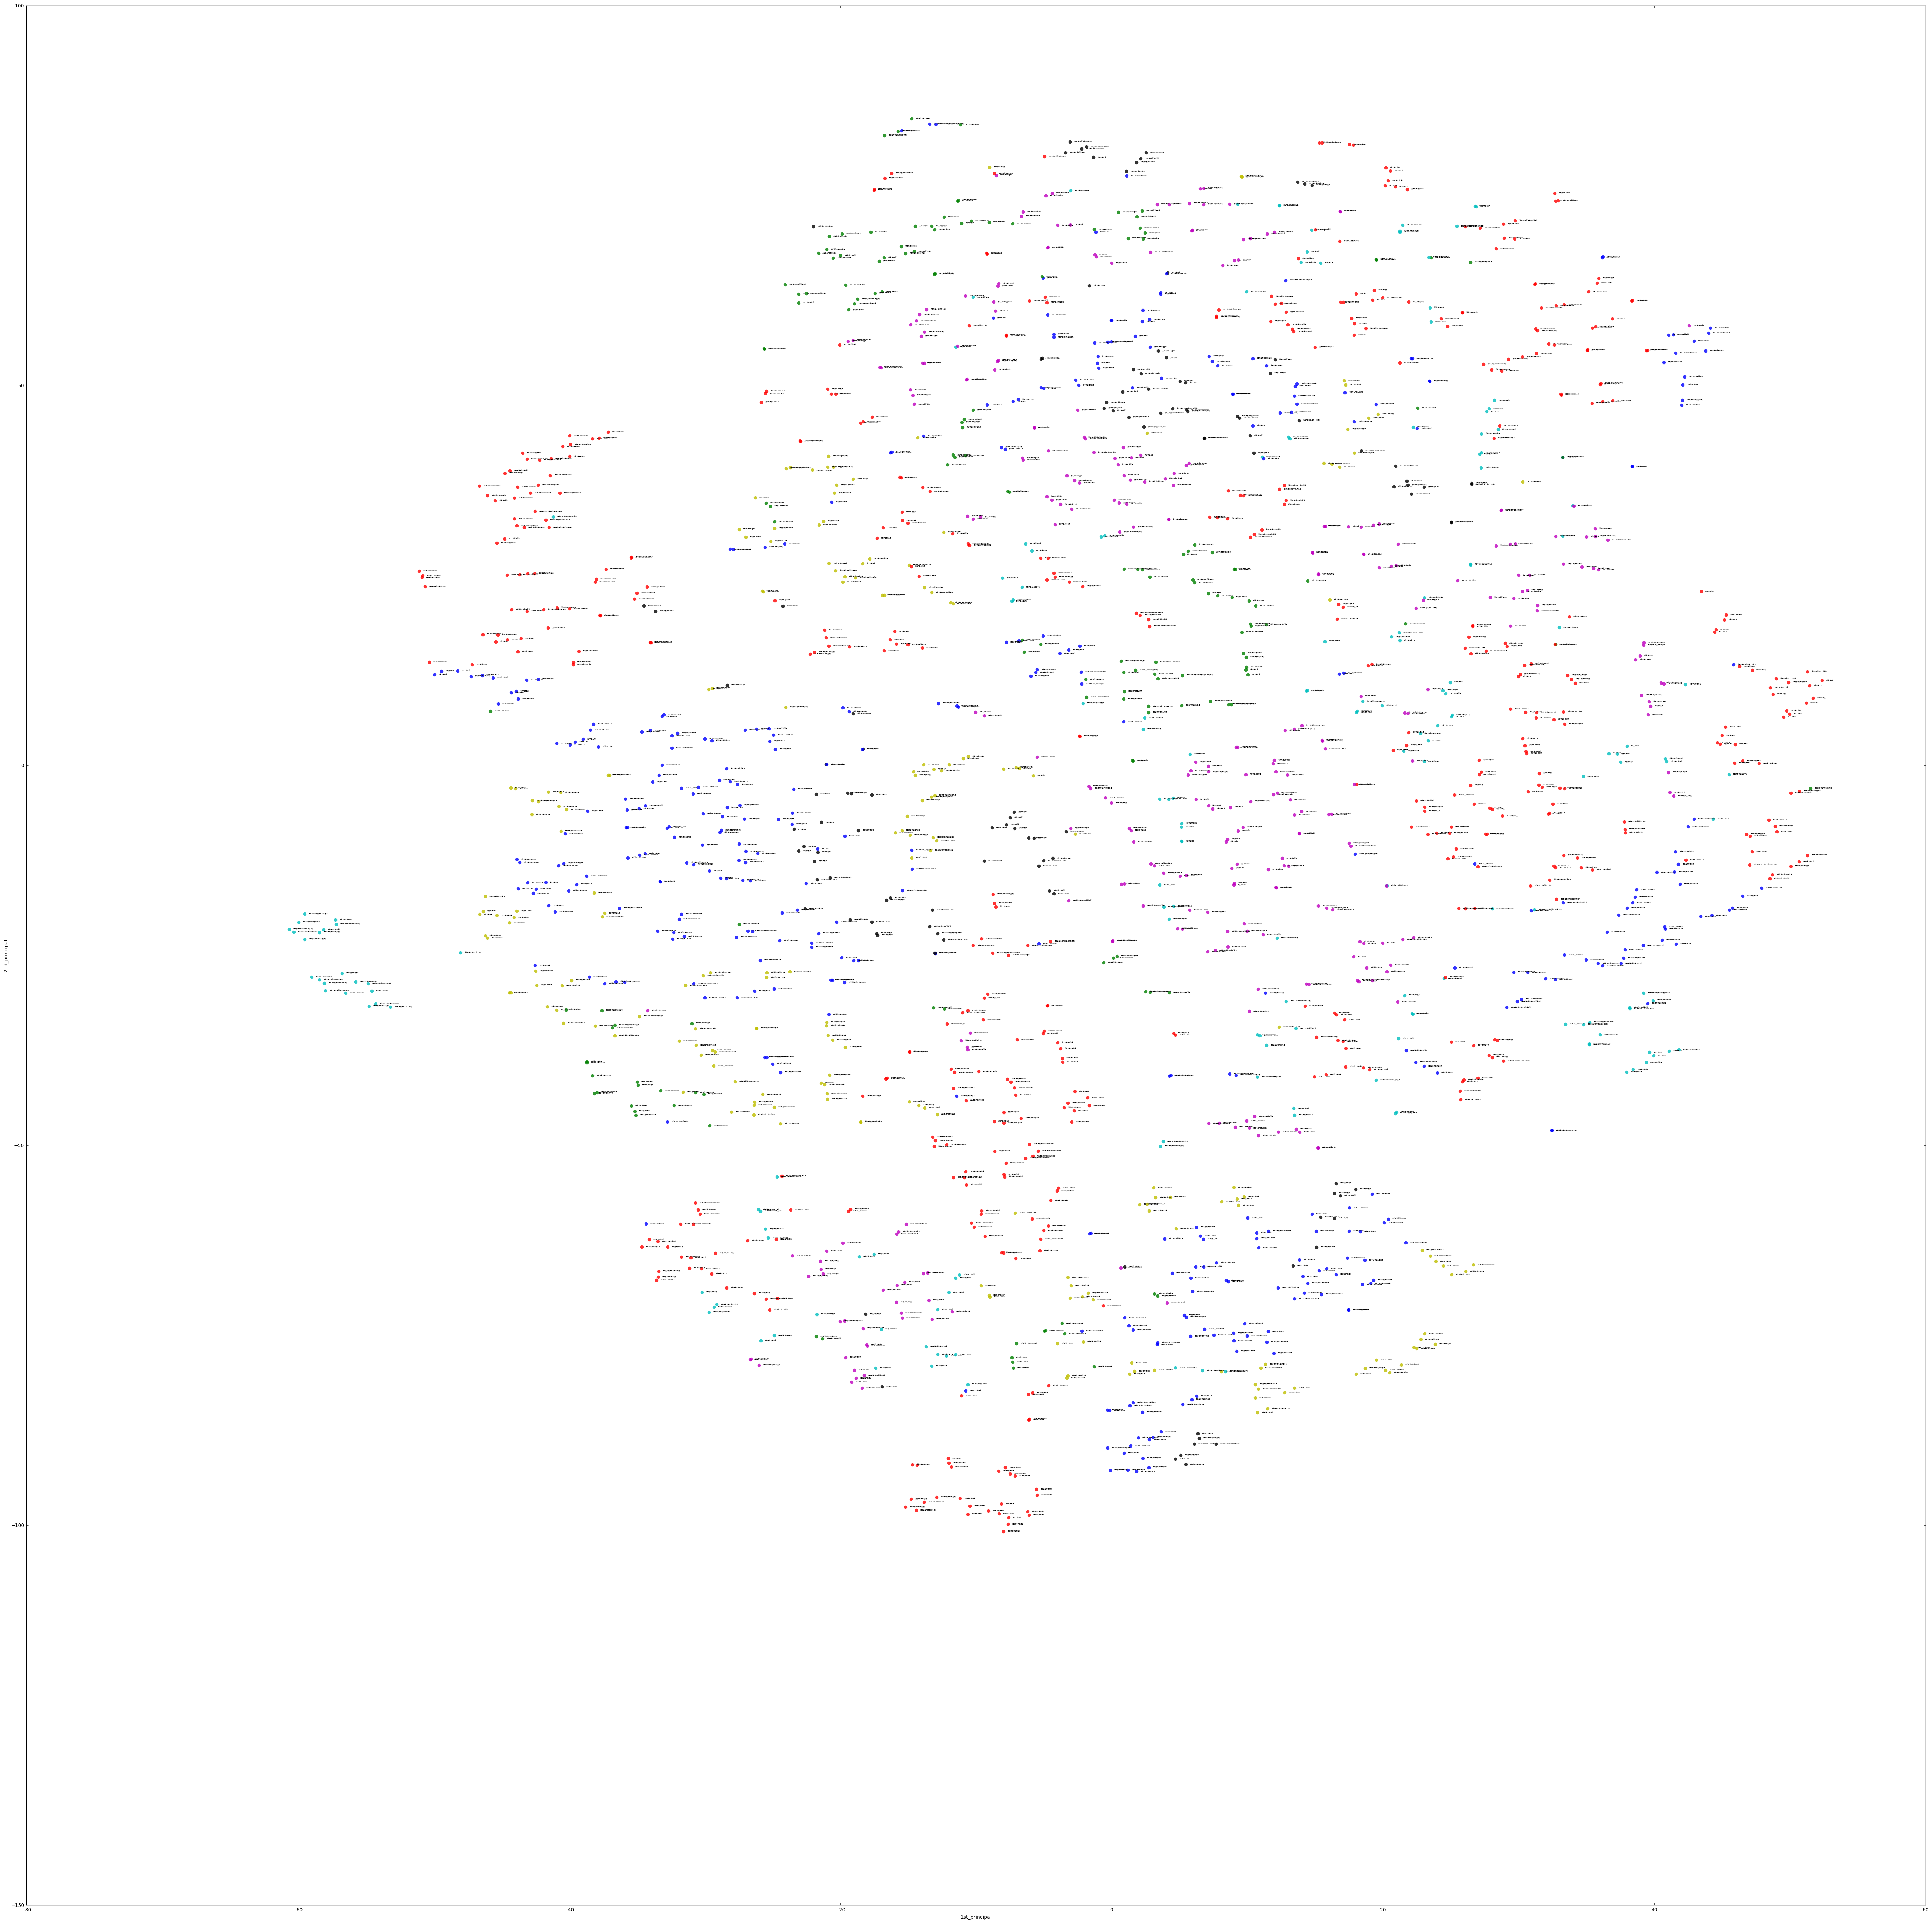

In [39]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Users/chessy/anaconda3/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/MicrosoftJhengHei.ttf')

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, metric='cosine', random_state=3)
tsne_results = tsne.fit_transform(m)


def draw2(one, two):
    fig, ax = plt.subplots()
    fig.set_size_inches(70, 70)
    sn.set_palette("hls", 11)
    new_coordinates = np.vstack((one, two, skool['category_id'],skool['school_name'], skool['department_name_abbr'])).T
    df = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label", "school","abbr"))
    sn.regplot(data=df[df.label=='1'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='10'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='2'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='3'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='4'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='5'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='6'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='7'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='8'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='9'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})
    sn.regplot(data=df[df.label=='99'], x="1st_principal", y="2nd_principal", fit_reg=False, marker="o", scatter_kws={'s':40})

    for i in range(0,df.shape[0]):
         plt.text(df["1st_principal"][i]+0.3, df["2nd_principal"][i], str(df["school"][i])+str(df["abbr"][i]), fontsize=3, horizontalalignment='left', color='black', weight='semibold',fontproperties=myfont)

    plt.savefig('temp.png', dpi=300)
    plt.show()
draw2(tsne_results[:,0], tsne_results[:,1])